In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

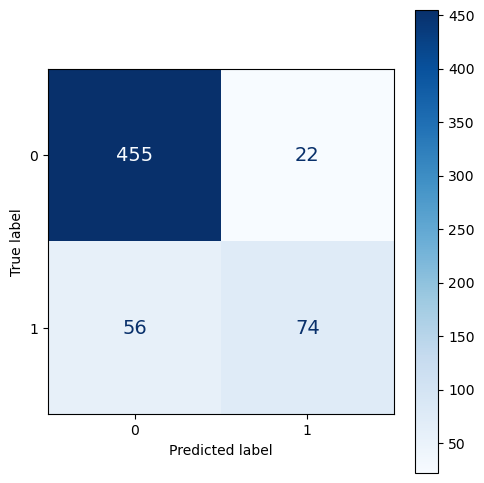

In [3]:
# 读取模型预测结果
df = pd.read_csv("test_result_TabPFN_binary_classification.csv")

# 混淆矩阵
cm = confusion_matrix(df['true_label'], df['predicted_label'])

# 可视化
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))  # 调整图的大小（可选）
disp.plot(cmap="Blues", ax=ax)

# 修改数字字体大小
for row in disp.text_:
    for text in row:
        text.set_fontsize(14)

plt.tight_layout()
plt.show()

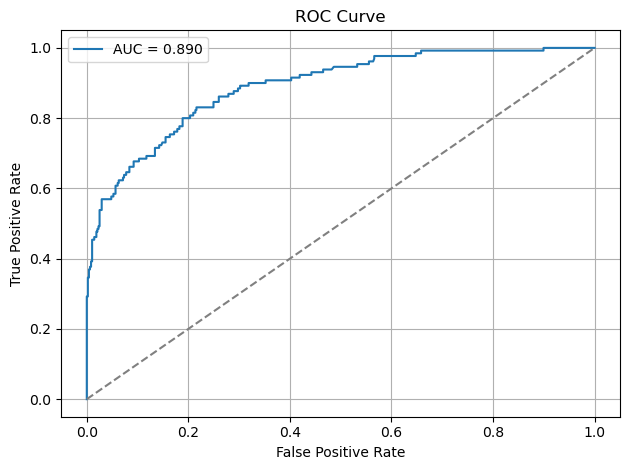

In [4]:
# 真实标签和预测概率
y_true = df["true_label"]
y_score = df["predicted_proba"]

# ROC 曲线（注意：不再使用 pos_label）
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# 绘图
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()